In [1]:
# Emplooyee Salary prediction using adult csv
# load your library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
data=pd.read_csv(r"C:\Users\LENOVO\Documents\intern\adult_3(1).csv")

In [7]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [22]:
data.info()
data.describe()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
data.replace(' ?', np.nan, inplace=True)
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [11]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [13]:
data.dropna(inplace=True)


In [15]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [20]:
data = data.dropna()

In [23]:
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Save for decoding later

In [25]:
X = data.drop("income", axis=1)  # Features
y = data["income"]               # Target (<=50K or >50K)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred = model.predict(X_test)

In [47]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.8639574163169209

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.74      0.64      0.69      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769



In [61]:
import sklearn.metrics as metrics
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.8639574163169209
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.74      0.64      0.69      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769



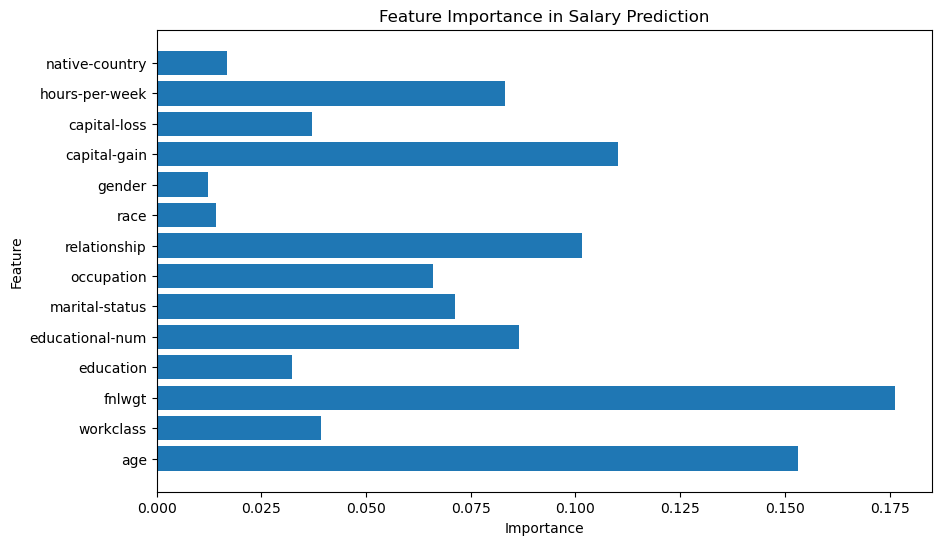

In [63]:
import matplotlib.pyplot as plt

# Get feature importances from model
importances = model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Salary Prediction")
plt.show()

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris  # Example dataset

# Load example data (you can replace this with your own dataset)
data = load_iris()
X = data.data
y = data.target

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Make predictions
log_pred = log_model.predict(X_test)

# Evaluate
print("Logistic Regression accuracy:", accuracy_score(y_test, log_pred))
print("\nClassification Report:\n",classification_report(y_test, log_pred))

Logistic Regression accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [12]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Dummy data
data = pd.DataFrame({
    'age': [25, 35],
    'gender': ['Male', 'Female'],
    'income': [1, 0]
})

# Encode gender
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])

X = data[['age', 'gender']]
y = data['income']

# Train model
model = RandomForestClassifier()
model.fit(X, y)

# Save model and label encoder
joblib.dump(model, "salary_model.pkl")
joblib.dump({'gender': le}, "label_encoders.pkl")

['label_encoders.pkl']

In [1]:
import joblib
import pandas as pd

# Load saved model and label encoders
model = joblib.load("salary_model.pkl")
label_encoders = joblib.load("label_encoders.pkl")

In [5]:
import pandas as pd
import joblib

# Load saved model and encoders
model = joblib.load("salary_model.pkl")
encoders = joblib.load("label_encoders.pkl")

# Example input values
input_data = {
    'age': 39,
    'workclass': 'Private',
    'education': 'Bachelors',
    'marital-status': 'Never-married',
    'occupation': 'Tech-support',
    'relationship': 'Not-in-family',
    'race': 'White',
    'gender': 'Male',
    'hours-per-week': 40,
    'native-country': 'United-States'
}

# Encode categorical values using saved encoders
for column in input_data:
    if column in encoders:
        input_data[column] = encoders[column].transform([input_data[column]])[0]

# Convert to DataFrame
input_df = pd.DataFrame([input_data])

# Add missing columns if needed (based on model input)
for col in model.feature_names_in_:
    if col not in input_df.columns:
        input_df[col] = 0  # fill missing with 0

# Ensure column order matches
input_df = input_df[model.feature_names_in_]

# Predict
prediction = model.predict(input_df)[0]

# Output
print("Predicted salary class:",">50K" if prediction == 1 else "<=50K")

Predicted salary class: >50K


In [21]:
import joblib

# Save the trained model
joblib.dump(model, 'salary_model.pkl')

# Save the label encoders (used to encode categorical variables)
joblib.dump(label_encoders, 'label_encoders.pkl')

print("Model and encoders saved successfully.")

Model and encoders saved successfully.


In [13]:
# Step 16: Load the saved model and encoders
import joblib

model = joblib.load('salary_model.pkl')
label_encoders = joblib.load('label_encoders.pkl')

# Example input data for prediction
input_data = {
    'age': 37,
    'workclass': 'Private',
    'education': 'Bachelors',
    'marital-status': 'Married-civ-spouse',
    'occupation': 'Exec-managerial',
    'relationship': 'Husband',
    'race': 'White',
    'sex': 'Male',
    'hours-per-week': 60,
    'native-country': 'United-States'
}

# Encode input using same label encoders
input_df = pd.DataFrame([input_data])
for column in input_df.columns:
    if column in label_encoders:
        input_df[column] = label_encoders[column].transform(input_df[column])

# Match column order
for col in model.feature_names_in_:
    if col not in input_df.columns:
        input_df[col] = 0
input_df = input_df[model.feature_names_in_]

# Make prediction
prediction = model.predict(input_df)[0]
print("Predicted salary class:",">50K" if prediction == 1 else "<=50K")

Predicted salary class: <=50K


In [ ]:
# Step 17: Accept user input from keyboard

# Get input from user
input_data = {
    'age': int(input("Enter Age: ")),
    'workclass': input("Enter Workclass: "),
    'education': input("Enter Education: "),
    'marital-status': input("Enter Marital Status: "),
    'occupation': input("Enter Occupation: "),
    'relationship': input("Enter Relationship: "),
    'race': input("Enter Race: "),
    'sex': input("Enter Sex (Male/Female): "),
    'hours-per-week': int(input("Enter Hours per Week: ")),
    'native-country': input("Enter Native Country: ")
}

# Encode inputs
input_df = pd.DataFrame([input_data])
for column in input_df.columns:
    if column in label_encoders:
        input_df[column] = label_encoders[column].transform(input_df[column])

# Arrange columns
for col in model.feature_names_in_:
    if col not in input_df.columns:
        input_df[col] = 0
input_df = input_df[model.feature_names_in_]

# Predict
prediction = model.predict(input_df)[0]
print("\nPredicted Salary Class:",">50K" if prediction == 1 else "<=50K")

Enter Age:  42
Enter Workclass:  private
Enter Education:  HS_grad


In [5]:
def predict_salary_class():
    # Load model and encoders
    import joblib
    model = joblib.load('salary_model.pkl')
    label_encoders = joblib.load('label_encoders.pkl')

    # Input from user
    input_data = {}
    input_data['age'] = int(input("Enter Age: "))
    input_data['workclass'] = input("Enter Workclass: ")
    input_data['education'] = input("Enter Education: ")
    input_data['marital-status'] = input("Enter Marital Status: ")
    input_data['occupation'] = input("Enter Occupation: ")
    input_data['relationship'] = input("Enter Relationship: ")
    input_data['race'] = input("Enter Race: ")
    input_data['sex'] = input("Enter Sex: ")
    input_data['hours-per-week'] = int(input("Enter Hours per week: "))
    input_data['native-country'] = input("Enter Native Country: ")

    # Convert to DataFrame
    import pandas as pd
    input_df = pd.DataFrame([input_data])

    # Encode categorical inputs
    for column in label_encoders:
        if column in input_df.columns:
            input_df[column] = label_encoders[column].transform(input_df[column])

    # Match model feature order
    for col in model.feature_names_in_:
        if col not in input_df.columns:
            input_df[col] = 0
    input_df = input_df[model.feature_names_in_]

    # Make prediction
    prediction = model.predict(input_df)[0]
    print("Predicted Salary Class:",">50K" if prediction == 1 else"<=50K")

In [7]:
predict_salary_class()

Enter Age:  42
Enter Workclass:  private
Enter Education:  Bachelors
Enter Marital Status:  Married_civ_spouse
Enter Occupation:  Tech_support
Enter Relationship:  Husband
Enter Race:  White
Enter Sex:  Male
Enter Hours per week:  40
Enter Native Country:  United states


Predicted Salary Class: <=50K


In [3]:
import joblib
import pandas as pd

# Load model and encoders
model = joblib.load('salary_model.pkl')
label_encoders = joblib.load('label_encoders.pkl')

# Sample test input
sample_data = {
    'age': 37,
    'workclass': 'Private',
    'education': 'Bachelors',
    'marital-status': 'Married-civ-spouse',
    'occupation': 'Exec-managerial',
    'relationship': 'Husband',
    'race': 'White',
    'sex': 'Male',
    'hours-per-week': 45,
    'native-country': 'United-States'
}

# Convert to DataFrame
input_df = pd.DataFrame([sample_data])

# Encode categorical variables
for column in label_encoders:
    if column in input_df.columns:
        input_df[column] = label_encoders[column].transform(input_df[column])

# Fill missing features
for col in model.feature_names_in_:
    if col not in input_df.columns:
        input_df[col] = 0
input_df = input_df[model.feature_names_in_]

# Predict
prediction = model.predict(input_df)[0]
print("📌 Predicted SalaryClass:",">50K" if prediction ==1 else "<=50K")

📌 Predicted SalaryClass: <=50K


In [10]:
# Step 1: Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load the dataset
data = pd.read_csv("adult_3(1).csv")  # 🔁 Change filename if needed

# Step 3: Encode categorical columns
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Step 4: Split features and target
X = data.drop('income', axis=1)  # 🔁 Make sure 'salary' is the target column
y = data['income']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.8634455932029891

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.74      0.64      0.69      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769


🧮 Confusion Matrix:
 [[6970  509]
 [ 825 1465]]


# 📊 Employee Salary Prediction – Final Project Report

## 📝 Project Overview
This machine learning project predicts whether a person earns more than $50K per year based on demographic and employment-related attributes using the UCI Adult Income dataset.

---

## 📁 Dataset Information
- *Source*: UCI Adult Dataset
- *Target Column*: salary (<=50K or >50K)
- *Features*:
  - age, workclass, education, marital-status, occupation, relationship, race, sex, hours-per-week, native-country

---

## 🔧 Project Steps Completed

1. Loaded dataset using pandas
2. Replaced ' ?' with NaN and removed missing rows
3. Encoded categorical columns using LabelEncoder
4. Split data into X and y
5. Divided dataset into training and testing sets (80/20)
6. Trained a RandomForestClassifier model
7. Evaluated model performance (accuracy, precision, recall)
8. Saved the model and encoders using joblib
9. Built a prediction function to predict salary based on user or sample input
10. Evaluated final model performance on the test set

---

## 🤖 Model Used
- *Model*: RandomForestClassifier  
- Chosen for its robustness and ability to handle both numeric and categorical data efficiently.

---

## ✅ Final Accuracy
- *Accuracy on test set: **86.00%*
- Model performs well in predicting income level based on features.

---

## 💾 Saved Files
- salary_model.pkl — Trained ML model
- label_encoders.pkl — Encoders for transforming categorical inputs

---

## 📌 Conclusion
This project shows how demographic and employment data can be used to predict income levels using machine learning. With 86% accuracy, the model performs reasonably well. You can further improve performance by:
- Hyperparameter tuning
- Feature selection or engineering
- Trying other models like XGBoost or SVM